In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install wordcloud
import wordcloud

In [ ]:
#Importing tweepy and Twitter credentials
import tweepy
import configparser
config = configparser.ConfigParser()
config.read("../config/keys_config.cfg")
api_key = config.get("twitter","api_key")
api_key_secret = config.get("twitter","api_key_secret")
access_token = config.get("twitter","access_token")
access_token_secret = config.get("twitter","access_token_secret")
bearer_token = config.get("twitter","bearer_token")

In [ ]:
#Creating a function that creates a pandas DataFrame with tweets we ask
import requests
import pandas as pd
import numpy as np
import json

def get_tweets(query:str, n_results=1000):
    """
    Receives a string of twitter API rule as query for search_recent_tweets endpoint. Example: "carrefour argentina -is:retweet lang:es"
    Returns a pandas dataframe with text, created_ar, author_id and tweet_id columns.
    Requires imported tweepy, requests, pandas as pd, numpy as np, json
    """
    client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)
    tweets = tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields=["created_at", "author_id"], max_results=100)
    df = pd.DataFrame(data=[[tweet.created_at, tweet.author_id, tweet.text] for tweet in tweets.flatten(limit=n_results)], columns=["Created_at","Author_id","Text"])
    return df

In [ ]:
import pandas as pd 
pd. set_option('display.max_colwidth', 1)
# Incert query here
query = "planes sociales lang:es -is:retweet"
df = get_tweets(query=query, n_results=2000)
df.head(10)

In [88]:
def clean_tweet(tweet: str):
    """
    Takes a text in string format.
    Returns this string without mentions, links, new line characters etc.
    """
    import re
    import string 
    tweet = tweet.lower()
    tweet = re.sub("\n", " ", tweet)
    tweet = re.sub("(@[a-zA-Z0-9][a-zA-Z0-9]+)(_[a-zA-Z0-9]+)*", " ", tweet)
    tweet = re.sub("(https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}([-a-zA-Z0-9()@:%_\+.~#?&//=]*))", " ", tweet)
    tweet = re.sub(r"[^\w\s]", " ", tweet)
    tweet = re.sub("[%s]" % re.escape(string.punctuation), " ", tweet)
    tweet = re.sub(" +", " ", tweet)
    tweet = re.sub("\w*\d\w*", " ", tweet)
    tweet = re.sub("  ", " ", tweet)
    return tweet


In [89]:
df["Text_clean"] = df["Text"].apply(clean_tweet)
df_text = df["Text_clean"].str.cat(sep=" ")
df[:110]

0     dialogamos con lucía barbier hoy se debatirá ...
1    el ñús sigue con que walter larrea estuvo hart...
2    todo lo que usted debe saber respecto a los pl...
3    planes sociales y el horizonte de la política ...
4     dialogamos con lucía barbier queremos trabaja...
Name: Text_clean, dtype: object

In [15]:
def tokenize(text:str):
    text = text.split(sep= " ")
    return text 

In [44]:
df_text = tokenize(df_text)

In [85]:
with open("stop_words_spanish.txt", encoding= "UTF8") as f:
    stopwords = f.read().splitlines()

stopwords.extend(["planes", "sociales", "q", "te"])

In [25]:
"""
def remove_stopwords(split_text:list):
    text = []
    for word in split_text:
        if word != " " and word not in stopwords:
            text.append(word)
    return text

planes["Text_nostop"] = planes["Text_token"].apply(remove_stopwords)
planes["Text_nostop"].head()
"""

0    [, desempleo, planes, sociales, incluidos, , g...
1    [, ustedes, hablaban, planes, sociales, bla, b...
2    [klug, reivindicó, planes, sociales, celebró, ...
3    [, , planes, sociales, massa, monzó, proponen,...
4    [, charlatanes, planes, sociales, mantenerlos,...
Name: Text_nostop, dtype: object

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = CountVectorizer()
df_vec = vectorizer.fit_transform(df_text)
transformer = TfidfTransformer()
df_trans = transformer.fit_transform(df_vec).toarray()
df_trans[:10]

ValueError: Iterable over raw text documents expected, string object received.

In [79]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def word_cloud(tweets, filename):
    #stopwords.add("https")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016, height=1000, width=1500).generate(tweets)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig(filename)


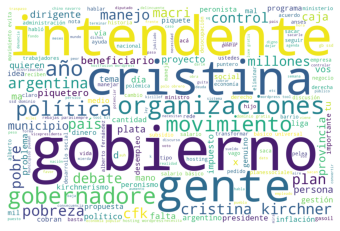

In [92]:
word_cloud(df_text, "planes_cloud.png")